<a href="https://colab.research.google.com/github/mansi-98/facial_emotion_recognition/blob/master/facial_emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import cv2
import glob
import warnings
from keras.layers import Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

warnings.simplefilter('ignore')

In [0]:
img_size = 48
image=cv2.imread('/content/drive/My Drive/dataset/angry/angry1.jpg')
image=cv2.resize(image,(img_size,img_size),interpolation=cv2.INTER_AREA)

In [0]:
img_size = 48
def read_images(path,emotion) :
    images = []
    labels = []
    for img in glob.glob(path+"/"+emotion+"/*.jpg") :
        image = cv2.imread(img)
        image=cv2.resize(image,(img_size,img_size),interpolation=cv2.INTER_AREA)
        images.append(image)
        labels.append(emotion)
    return labels,images 
labels,images_angry = read_images("/content/drive/My Drive/dataset","angry")    

In [116]:
labels

['angry', 'angry']

In [0]:
def read_images_gray(path,emotion) :
    images = []
    labels = []
    for img in glob.glob(path+"/"+emotion+"/*.png") :
        n = cv2.imread(img)
        n = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY)
        images.append(n)
        labels.append(emotion)
    return labels,images

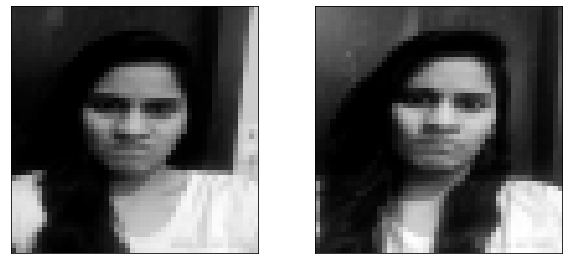

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(2) :
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_angry[i],cmap = plt.cm.binary)

In [0]:
labels,images_happy = read_images("/content/drive/My Drive/test","happy")

In [0]:
labels_full = ['angry','happy','neutral','sad','surprise']
full_Images = []
full_Labels = []
for label in labels_full :
    labels,images = read_images("/content/drive/My Drive/dataset",label)
    full_Images = full_Images + images
    full_Labels = full_Labels + labels

In [0]:
for label in labels_full :
    labels,images = read_images("/content/drive/My Drive/test",label) 
    full_Images = full_Images + images
    full_Labels = full_Labels + labels 

In [0]:
#full_Images

In [123]:
full_Labels

['angry',
 'angry',
 'happy',
 'happy',
 'neutral',
 'neutral',
 'sad',
 'sad',
 'surprise',
 'surprise',
 'angry',
 'happy',
 'neutral',
 'sad',
 'surprise']

In [0]:
X = np.array(full_Images)

In [0]:
dic = {'angry' : 0 , 'happy' : 1,'neutral':2,'sad':3,'surprised':4}

In [126]:
inv_dic = {v: k for k, v in dic.items()}
inv_dic

{0: 'angry', 1: 'happy', 2: 'neutral', 3: 'sad', 4: 'surprised'}

In [0]:
y = np.array(full_Labels)

for i,element in enumerate(y) :
    if element == 'angry' :
        y[i] = 0
    elif element == 'happy' :
        y[i] = 1
    elif element == 'neutral' :
        y[i] = 2
    elif element == 'sad' :
        y[i] = 3
    else :
        y[i] = 4

In [0]:
from sklearn.utils import shuffle
import numpy as np


X, y = shuffle(X, y)

In [0]:
from keras import utils 

y = utils.to_categorical(y,5)

In [130]:
print(X.shape)
print(y.shape)

(15, 48, 48, 3)
(15, 5)


In [0]:
from numpy import save

save('X.npy',X)
save('Y.npy',y)

# Model

In [132]:
from keras.layers import Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv2D(64,kernel_size=(3,3),kernel_regularizer=l2(0.0001),activation='relu',input_shape=(48,48,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.3))

model.add(Conv2D(128,kernel_size=(3,3),kernel_regularizer=l2(0.0001),activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

# model.add(Conv2D(256,kernel_size=(3,3),kernel_regularizer=l2(0.0001),activation='relu'))
# model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Flatten())


model.add(Dense(1024,kernel_regularizer=l2(0.001),activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(5,activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 46, 46, 64)        1792      
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 44, 44, 64)        36928     
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 42, 42, 64)        36928     
_________________________________________________________________
batch_normalization_22 (Batc (None, 42, 42, 64)        256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 21, 21, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 19, 19, 128)      

In [133]:
batch = 32
epoch = 50


#from keras import optimizers

#optimus_prime = optimizers.Adam(lr=0.002, beta_1=0.85, beta_2=0.999, amsgrad=False)


model.compile(optimizer='RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X,y,validation_split=0.1,batch_size = batch,epochs = epoch)

Train on 13 samples, validate on 2 samples
Epoch 1/50
13/13 [==============================] - 1s 87ms/step - loss: 7.0212 - accuracy: 0.2308 - val_loss: 393.8417 - val_accuracy: 0.0000e+00
Epoch 2/50
13/13 [==============================] - 1s 43ms/step - loss: 9.2886 - accuracy: 0.3846 - val_loss: 502.5640 - val_accuracy: 0.0000e+00
Epoch 3/50
13/13 [==============================] - 1s 45ms/step - loss: 28.8277 - accuracy: 0.4615 - val_loss: 195.2747 - val_accuracy: 0.0000e+00
Epoch 4/50
13/13 [==============================] - 1s 42ms/step - loss: 15.0938 - accuracy: 0.3077 - val_loss: 356.3029 - val_accuracy: 0.0000e+00
Epoch 5/50
13/13 [==============================] - 1s 43ms/step - loss: 17.7326 - accuracy: 0.5385 - val_loss: 157.2603 - val_accuracy: 0.0000e+00
Epoch 6/50
13/13 [==============================] - 1s 43ms/step - loss: 11.7261 - accuracy: 0.6154 - val_loss: 246.2617 - val_accuracy: 0.0000e+00
Epoch 7/50
13/13 [==============================] - 1s 46ms/step - loss

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        fill_mode='nearest')

In [135]:
it = datagen.flow(X,y)
model.fit_generator(it,steps_per_epoch=40,epochs=20)

Epoch 1/20
40/40 [==============================] - 24s 604ms/step - loss: 6.7993 - accuracy: 0.4617
Epoch 2/20
40/40 [==============================] - 24s 603ms/step - loss: 4.7425 - accuracy: 0.5683
Epoch 3/20
40/40 [==============================] - 24s 602ms/step - loss: 4.4550 - accuracy: 0.5750
Epoch 4/20
40/40 [==============================] - 24s 599ms/step - loss: 4.2501 - accuracy: 0.6183
Epoch 5/20
40/40 [==============================] - 24s 602ms/step - loss: 4.0136 - accuracy: 0.6333
Epoch 6/20
40/40 [==============================] - 24s 602ms/step - loss: 3.9716 - accuracy: 0.6417
Epoch 7/20
40/40 [==============================] - 24s 601ms/step - loss: 3.6565 - accuracy: 0.6417
Epoch 8/20
40/40 [==============================] - 24s 602ms/step - loss: 3.1780 - accuracy: 0.6833
Epoch 9/20
40/40 [==============================] - 24s 601ms/step - loss: 3.1802 - accuracy: 0.6983
Epoch 10/20
40/40 [==============================] - 24s 601ms/step - loss: 2.6537 - accura

In [0]:
def evaluation(Z):
    plt.style.use("ggplot")

    plt.figure(figsize=(20,8))
    plt.plot(Z.history["loss"], label="train_loss")
    plt.plot(Z.history["val_loss"], label="val_loss")
    plt.plot(Z.history['acc'], label="train_acc")
    plt.plot(Z.history['val_acc'], label="val_acc")
    plt.title("Training Loss and Accuracy on Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")

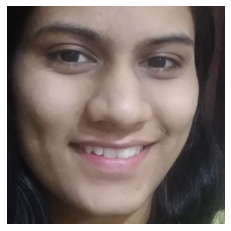

In [137]:
import dlib
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt


def detect_faces(image):

    # Create a face detector
    face_detector = dlib.get_frontal_face_detector()

    # Run detector and get bounding boxes of the faces on image.
    detected_faces = face_detector(image, 1)
    face_frames = [(x.left(), x.top(),
                    x.right(), x.bottom()) for x in detected_faces]

    return face_frames

# Load image

img_path = '/content/drive/My Drive/IMG_20200516_163604.jpg'
image = io.imread(img_path)

# Detect faces
detected_faces = detect_faces(image)
tab_faces = [] 
# Crop faces and plot
for n, face_rect in enumerate(detected_faces):
    face = Image.fromarray(image).crop(face_rect)
    tab = np.asarray(face)
    tab_faces.append(tab)
    plt.subplot(1, len(detected_faces), n+1)
    plt.axis('off')
    plt.imshow(face)

In [0]:
image_to_predict = np.asarray(face)
img = cv2.resize(image_to_predict,(48,48),3)

happy


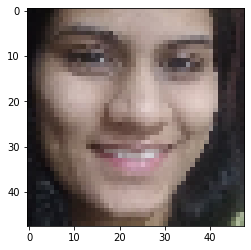

In [139]:
tab = []
tab.append(img)
tab = np.array(tab)
print(inv_dic[np.argmax(model.predict(tab))])
plt.imshow(tab[0],cmap = plt.cm.binary)

In [140]:
for img in tab_faces :
  img = img = cv2.resize(img,(48,48),3)
  tab = []
  tab.append(img)
  tab = np.array(tab)
  print(inv_dic[np.argmax(model.predict(tab))])

happy


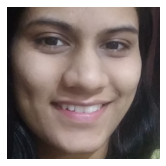

In [141]:
for i in range(len(tab_faces)) :
  plt.subplot(1, len(tab)+1, n+1)
  plt.axis('off')
  plt.imshow(tab_faces[i],cmap = plt.cm.binary)